# Project One

## Introduction


This project aims to explore the relationship between the geographical location of businesses and the reviews they receive on Yelp. The hypothesis is that a business's location could significantly impact the ratings and reviews it receives, possibly due to factors like accessibility, neighborhood preferences, local competition, and demographic characteristics. By analyzing business and review data, including geographical coordinates, star ratings, and review counts, we will seek to uncover any patterns that suggest a correlation between location and customer feedback.

Such insights could be invaluable for various stakeholders:
*   Business Owners could optimize their locations based on the characteristics of successful businesses in certain areas.
*   Marketers might use this information to tailor their strategies based on location-based customer preferences.
*   Urban Planners could understand better how business types and success rates are distributed across different urban



## Data Cleaning/Loading

In [16]:
import pandas as pd
import json

# Path to the Yelp business data file
file_path = 'yelp_academic_dataset_business.json'

# Load the data into a pandas DataFrame
data = []
with open(file_path, 'r') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)
df.head()

business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.955505  -75.155564    4.0            80        1   
4  40.338183  -75.471659    4.5            13        1   

                                          attributes  \
0                      {'ByAppointmentOnly': 'True'}   
1             {'BusinessAcceptsCreditCards': 'True'}   
2  {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3  {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4  {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   
2  Department Stores, Shopping, Fashion, Home & G...   
3  Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                          Brewpubs, Breweries, Food   

                                               hours  
0                                               None  
1  {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...  
2  {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...  
3  {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...  
4  {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...

In [17]:
# Initial Cleaning Steps
# Remove duplicates
df = df.drop_duplicates(subset='business_id')

# Handling missing values - This step would vary based on analysis needs
# For example, fill missing 'review_count' with 0
df['review_count'] = df['review_count'].fillna(0)

# Ensure correct data types
df['review_count'] = df['review_count'].astype(int)
df['stars'] = df['stars'].astype(float)
df['is_open'] = df['is_open'].astype(int)

# Example threshold - adjust based on your analysis
review_count_threshold = df['review_count'].quantile(0.25) # Or choose a specific number

# Filter for significant review counts
df = df[df['review_count'] >= review_count_threshold]

## Summary Statistics Tables

### Variable Selection
#### Y Variable (Dependent):
*   Restaurant Review Scores (stars). This directly maps to the "star rating, rounded to half-stars" provided in the dataset and represents the average customer review score for each restaurant.


#### X Variables (Independent, Location-related):

*   City (city): Reflects the urban area each restaurant is located in, allowing us to assess how review scores vary across different cities.

*   State (state): Provides a broader geographical context than city, useful for observing regional trends in review scores.

In [18]:
# Summary statistics for stars and review_count
summary_stars = df['stars'].describe()
summary_review_count = df['review_count'].describe()

# Group by city or state for summary statistics
city_summary = df.groupby('city')['stars'].describe()
state_summary = df.groupby('state')['stars'].describe()

print("Review Scores Summary:\n", summary_stars)
print("\nReview Count Summary:\n", summary_review_count)
print("\nCity Review Summary:\n", city_summary)
print("\nState Review Summary:\n", state_summary)

Review Scores Summary:
 count    114158.000000
mean          3.592232
std           0.926383
min           1.000000
25%           3.000000
50%           3.500000
75%           4.500000
max           5.000000
Name: stars, dtype: float64

Review Count Summary:
 count    114158.000000
mean         57.233895
std         136.692626
min           8.000000
25%          12.000000
50%          22.000000
75%          51.000000
max        7568.000000
Name: review_count, dtype: float64

City Review Summary:
                    count      mean       std  min  25%  50%    75%  max
city                                                                   
AMBLER               1.0  3.000000       NaN  3.0  3.0  3.0  3.000  3.0
ARDMORE              1.0  3.000000       NaN  3.0  3.0  3.0  3.000  3.0
AVON                 1.0  3.500000       NaN  3.5  3.5  3.5  3.500  3.5
Abington           122.0  3.463115  0.916263  1.5  3.0  3.5  4.000  5.0
Abington Township    2.0  4.000000  0.000000  4.0  4.0  4.0  4.000

## Plots, Histograms, Figures

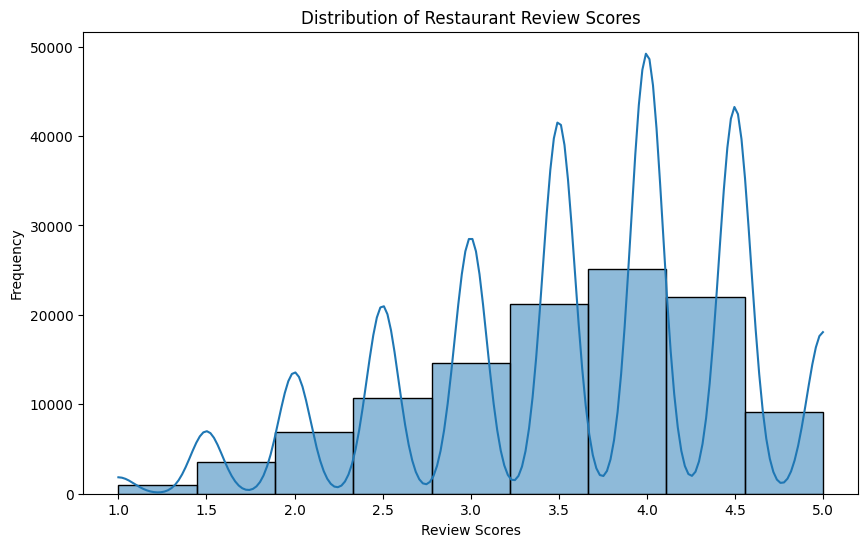

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for review scores
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], kde=True, bins=9)
plt.title('Distribution of Restaurant Review Scores')
plt.xlabel('Review Scores')
plt.ylabel('Frequency')
plt.show()

From the graph, we can observe that the most common review scores are clustered around the 3.5 to 4.0 range, suggesting that the majority of restaurants have ratings above average. Very few restaurants have ratings at the extreme low end (close to 1.0) or at the extreme high end (at 5.0). The distribution is not symmetric and shows that there are more restaurants with higher scores than lower scores, indicating a tendency for reviewers to give favorable ratings. The use of both bars and a line allows us to visualize both the raw frequency of scores as well as the smoothed distribution of scores across the dataset.

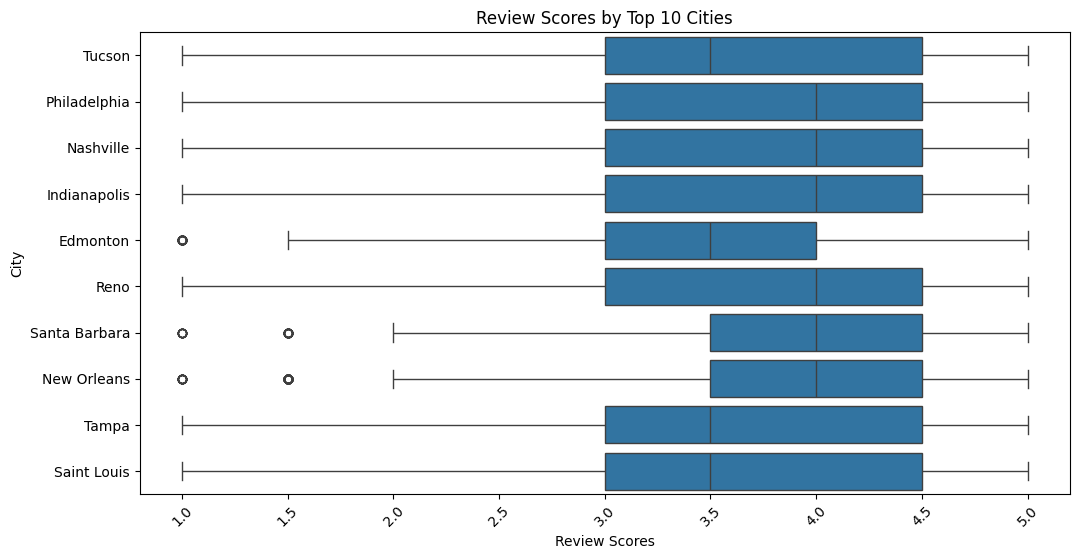

In [20]:
# Review scores by city/state - Boxplot to see distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='stars', y='city', data=df[df['city'].isin(df['city'].value_counts().head(10).index)])
plt.title('Review Scores by Top 10 Cities')
plt.xlabel('Review Scores')
plt.ylabel('City')
plt.xticks(rotation=45)
plt.show()

The spread of the boxes and the position of the median line suggest variations in the central tendency of scores across different cities. The chart helps in comparing the review score distributions between these cities.

The color of each circle indicates the average star rating of businesses in the city, with the color map ranging from red (lower average stars) to green (higher average stars). This means that cities with cooler colors (blue to green) have higher average star ratings, while those with warmer colors (yellow to red) have lower average star ratings.

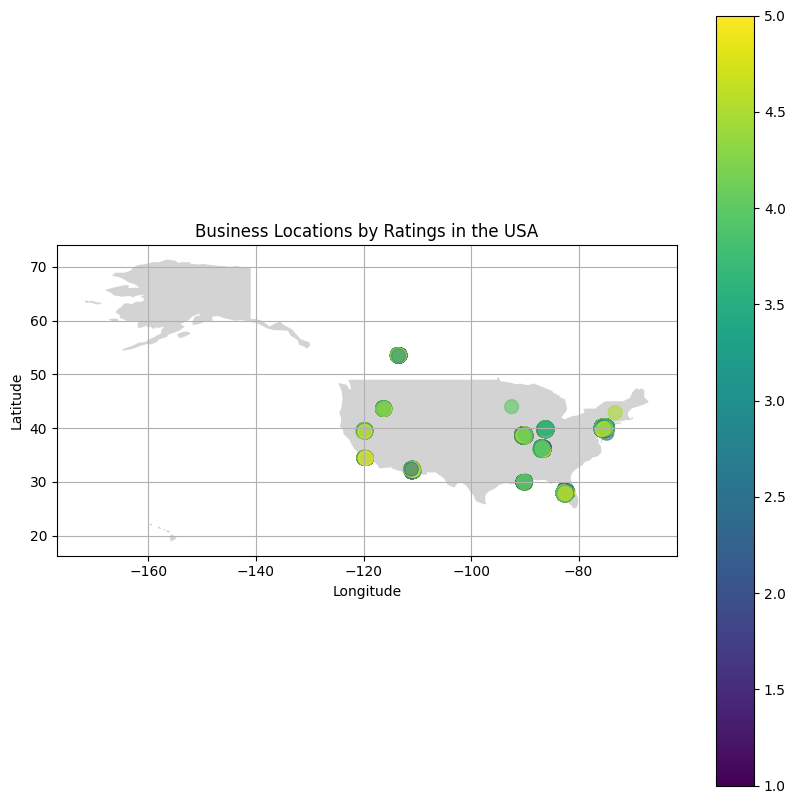

In [35]:
import geopandas as gpd
from shapely.geometry import Point

df = pd.DataFrame(data)

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Filter the world GeoDataFrame to only include the USA
usa = world[world.name == 'United States of America']

# Plotting the updated map with the focus on the USA
fig, ax = plt.subplots(figsize=(10, 10))
usa.plot(ax=ax, color='lightgrey')

# Plotting the business locations within the USA scope
gdf.plot(ax=ax, column='stars', cmap='viridis', legend=True, markersize=100, alpha=0.6)

# Adjusting the map settings to better focus on the USA
plt.title('Business Locations by Ratings in the USA')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.show()

## Conclusion

# Project Two

In [21]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import branca.colormap as cm
import matplotlib.pyplot as plt

In [29]:
# 1. Geospatial Heatmaps
# Generating a base map
def generate_base_map(default_location=[37.7749, -122.4194], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

# Creating a heatmap of business ratings
def create_heatmap(df, base_map):
    heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
    HeatMap(data=heat_data).add_to(base_map)
    return base_map

base_map = generate_base_map()
heatmap = create_heatmap(df, base_map)

heatmap

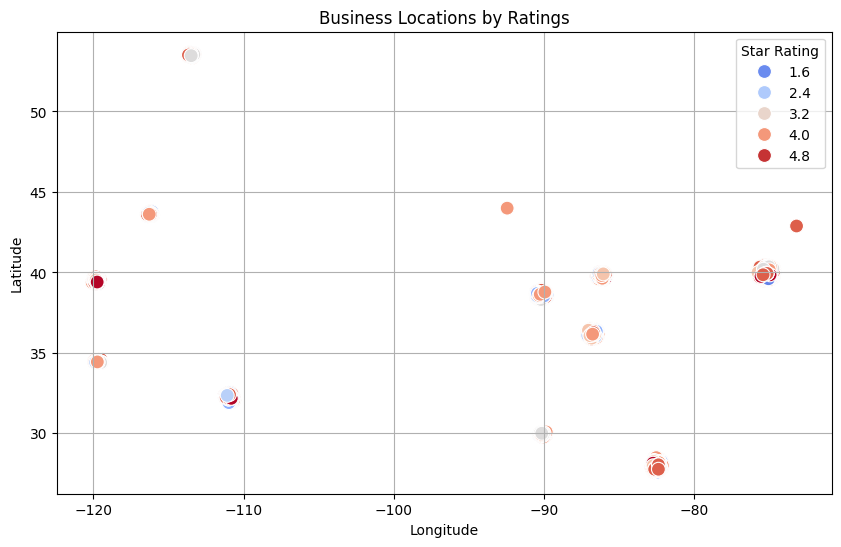

In [23]:
# 2. Scatter Plot with Hue for Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='stars', palette='coolwarm', s=100)
plt.title('Business Locations by Ratings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend(title='Star Rating')


Text(0.5, 1.0, 'Correlation between Stars and Review Count')

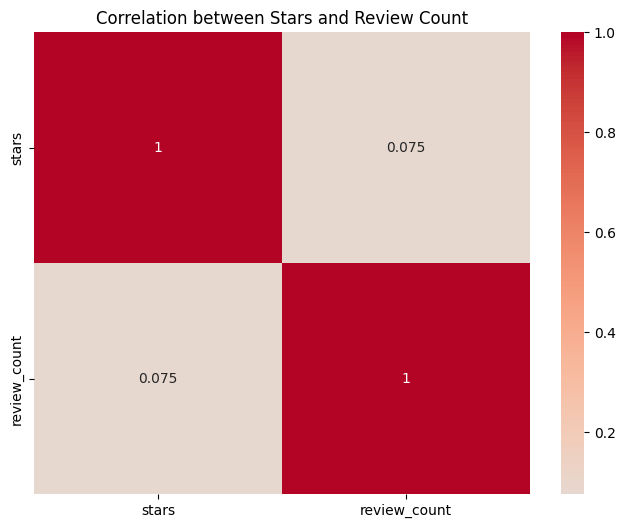

In [24]:
# Calculating correlation
correlation = df[['stars', 'review_count']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Stars and Review Count')

In [27]:
# Step 1: Aggregate data by city
city_aggregates = df.groupby('city').agg({
    'stars': 'mean',
    'latitude': 'mean',
    'longitude': 'mean',
    'review_count': 'sum'  # Assuming you have a 'review_count' column
}).reset_index()

# Rename columns for clarity
city_aggregates.rename(columns={'stars': 'average_stars'}, inplace=True)

# Step 2: Create the map
m = folium.Map(location=[37.7749, -122.4194], zoom_start=5)  # Adjust as needed

# Normalize the stars for color mapping
min_stars = city_aggregates['average_stars'].min()
max_stars = city_aggregates['average_stars'].max()
city_aggregates['normalized_stars'] = (city_aggregates['average_stars'] - min_stars) / (max_stars - min_stars)

# Create a color map
colormap = cm.LinearColormap(colors=['red', 'orange', 'yellow', 'blue', 'green'],
                             vmin=min_stars, vmax=max_stars, caption='Average Stars')

# Add points for each city
for _, row in city_aggregates.iterrows():
    color = colormap(row['average_stars'])
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5 + row['review_count'] / 10000,  # Adjust the scaling factor for your data
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(f"{row['city']}: {row['average_stars']:.2f} stars, {row['review_count']} reviews", max_width=300)
    ).add_to(m)

# Add the colormap to the map
colormap.add_to(m)

# Save the map to an HTML file (or display it in a Jupyter notebook)
m.save('yelp_review_map.html')
m